In [ ]:
import pandas as pd
import plotly as plt

data1 = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
data2 = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

In [ ]:
# prompt: satukan data 1 dan data 2

import pandas as pd
import plotly as plt

data1 = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
data2 = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

# Concatenate the dataframes



In [ ]:
sampled_data1 = data1.sample(frac=0.1, random_state=42)
sampled_data2 = data2.sample(frac=0.1, random_state=42)


sampled_data1['day_of_week'] = pd.to_datetime(sampled_data1['utcTimestamp'], errors='coerce').dt.day_name()



<ipython-input-44-262fc3434368>:5: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
def get_time_period(hour):
   if 5 <= hour < 12:
       return 'Pagi'
   elif 12 <= hour < 17:
       return 'Siang'
   elif 17 <= hour < 22:
       return 'Sore'
   else:
       return 'Malam'

In [ ]:


# Definisikan kategori tempat utama
kategori_tempat = {
   'Makan': ['Restaurant', 'Bar', 'Coffee Shop', 'Café'],
   'Budaya': ['Park', 'Museum', 'Temple', 'Shrine', 'Garden'],
   'Belanja': ['Mall', 'Shop', 'Store'],
   'Transportasi': ['Train Station', 'Subway']
}


# Kategorikan tempat
def kategorikan_tempat(venue):
   for kategori, kata_kunci in kategori_tempat.items():
       if any(k.lower() in venue.lower() for k in kata_kunci):
           return kategori
   return 'Lainnya'


sampled_data1['kategori_tempat'] = sampled_data1['venueCategory'].apply(kategorikan_tempat)
sampled_data2['kategori_tempat'] = sampled_data2['venueCategory'].apply(kategorikan_tempat)

In [ ]:
# prompt: satukan data 1 dan data 2

import pandas as pd
# Import the plotly.express module
import plotly.express as px

data1 = pd.read_csv('/content/dataset_TSMC2014_NYC.csv')
data2 = pd.read_csv('/content/dataset_TSMC2014_TKY.csv')

# Concatenate the dataframes
# ... rest of your code ...

sampled_data1['day_of_week'] = pd.to_datetime(sampled_data1['utcTimestamp'], errors='coerce').dt.day_name()

# Replace invalid dates with NaT (Not a Time)
sampled_data1['day_of_week'] = sampled_data1['day_of_week'].fillna(pd.NaT)

sampled_data1['is_weekend'] = sampled_data1['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah check-in per kategori
weekday_counts = sampled_data1[~sampled_data1['is_weekend']].groupby('venueCategory').size()
weekend_counts = sampled_data1[sampled_data1['is_weekend']].groupby('venueCategory').size()

# Gabungkan untuk visualisasi
popularity_comparison = pd.DataFrame({
    'Weekday': weekday_counts,
    'Weekend': weekend_counts
}).fillna(0)

# Plot
# Now you can use px.bar since plotly.express is imported as px
fig = px.bar(popularity_comparison,
             x=popularity_comparison.index,
             y=['Weekday', 'Weekend'],
             title='Perbedaan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan Newyork',
             labels={'x': 'Kategori Tempat', 'value': 'Jumlah Check-in'})
fig.show()


<ipython-input-47-e4542aa14eb2>:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
sampled_data2['day_of_week'] = pd.to_datetime(sampled_data2['utcTimestamp'], errors='coerce').dt.day_name()

# Replace invalid dates with NaT (Not a Time)
sampled_data2['day_of_week'] = sampled_data2['day_of_week'].fillna(pd.NaT)

sampled_data2['is_weekend'] = sampled_data2['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah check-in per kategori
weekday_counts = sampled_data2[~sampled_data2['is_weekend']].groupby('venueCategory').size()
weekend_counts = sampled_data2[sampled_data2['is_weekend']].groupby('venueCategory').size()

# Gabungkan untuk visualisasi
popularity_comparison = pd.DataFrame({
    'Weekday': weekday_counts,
    'Weekend': weekend_counts
}).fillna(0)

# Plot
# Now you can use px.bar since plotly.express is imported as px
fig = px.bar(popularity_comparison,
             x=popularity_comparison.index,
             y=['Weekday', 'Weekend'],
             title='Perbedaan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan Tokyo',
             labels={'x': 'Kategori Tempat', 'value': 'Jumlah Check-in'})
fig.show()

In [ ]:


# Function to get the time period
def get_time_period(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 22:
        return 'Sore'
    else:
        return 'Malam'

# Apply the functions to both dataframes
sampled_data1['time_period'] = pd.to_datetime(sampled_data1['utcTimestamp'], errors='coerce').dt.hour.apply(get_time_period)
sampled_data2['time_period'] = pd.to_datetime(sampled_data2['utcTimestamp'], errors='coerce').dt.hour.apply(get_time_period)

# Create the is_weekend column for both dataframes
sampled_data1['is_weekend'] = sampled_data1['day_of_week'].isin(['Saturday', 'Sunday'])
sampled_data2['is_weekend'] = sampled_data2['day_of_week'].isin(['Saturday', 'Sunday'])


def plot_popularity(df, city_name):
    # Group data by weekend/weekday and venue category
    weekday_counts = df[~df['is_weekend']].groupby(['kategori_tempat', 'time_period']).size().unstack(fill_value=0)
    weekend_counts = df[df['is_weekend']].groupby(['kategori_tempat', 'time_period']).size().unstack(fill_value=0)

    # Combine for visualization
    popularity_comparison = pd.DataFrame({
        'Weekday': weekday_counts.sum(axis=1),  # Summing counts across time periods for weekdays
        'Weekend': weekend_counts.sum(axis=1)   # Summing counts across time periods for weekends
    })

    # Plot
    fig = px.bar(popularity_comparison,
                 x=popularity_comparison.index,
                 y=['Weekday', 'Weekend'],
                 title=f'Perbedaan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan {city_name}',
                 labels={'x': 'Kategori Tempat', 'value': 'Jumlah Check-in'})
    fig.show()

plot_popularity(sampled_data1, 'New York')
plot_popularity(sampled_data2, 'Tokyo')

In [ ]:
sampled_data1['day_of_week'] = pd.to_datetime(sampled_data1['utcTimestamp'], errors='coerce').dt.day_name()

# Replace invalid dates with NaT (Not a Time)
sampled_data1['day_of_week'] = sampled_data1['day_of_week'].fillna(pd.NaT)

sampled_data1['is_weekend'] = sampled_data1['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah check-in per kategori
weekday_counts = sampled_data1[~sampled_data1['is_weekend']].groupby('venueCategory').size()
weekend_counts = sampled_data1[sampled_data1['is_weekend']].groupby('venueCategory').size()

# Gabungkan untuk visualisasi
popularity_comparison = pd.DataFrame({
    'Weekday': weekday_counts,
    'Weekend': weekend_counts
}).fillna(0)

# Plot
fig = px.bar(popularity_comparison,
             x=popularity_comparison.index,
             y=['Weekday', 'Weekend'],
             title='Perbedaan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan',
             labels={'x': 'Kategori Tempat', 'value': 'Jumlah Check-in'})
fig.show()

<ipython-input-50-48d1320d0fec>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
sampled_data1['utcTimestamp'] = pd.to_datetime(sampled_data1['utcTimestamp'])
sampled_data2['utcTimestamp'] = pd.to_datetime(sampled_data2['utcTimestamp'])
# mendapatkan waktu lokal dari timestamp dan timezone
sampled_data1['localTime'] = pd.to_datetime(sampled_data1['utcTimestamp']) + pd.to_timedelta(sampled_data1['timezoneOffset'], unit='m')
sampled_data2['localTime'] = pd.to_datetime(sampled_data2['utcTimestamp']) + pd.to_timedelta(sampled_data2['timezoneOffset'], unit='m')
# menambahkan kolom jam ke dalam dataset
sampled_data1['hour'] = sampled_data1['localTime'].dt.hour
sampled_data2['hour'] = sampled_data2['localTime'].dt.hour


In [ ]:
fig = px.bar(popularity_comparison,
             x=popularity_comparison.index,
             y=['Weekday', 'Weekend'],
             title='Perbedaan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan',
             labels={'x': 'Kategori Tempat', 'value': 'Jumlah Check-in'})
fig.show()

In [ ]:
sampled_data1['day_of_week'] = pd.to_datetime(sampled_data1['utcTimestamp'], errors='coerce').dt.day_name()

# Replace invalid dates with NaT (Not a Time)
sampled_data1['day_of_week'] = sampled_data1['day_of_week'].fillna(pd.NaT)

sampled_data1['is_weekend'] = sampled_data1['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah check-in per kategori
weekday_counts = sampled_data1[~sampled_data1['is_weekend']].groupby('venueCategory').size()
weekend_counts = sampled_data1[sampled_data1['is_weekend']].groupby('venueCategory').size()

# Gabungkan untuk visualisasi
popularity_comparison = pd.DataFrame({
    'Weekday': weekday_counts,
    'Weekend': weekend_counts
}).fillna(0)

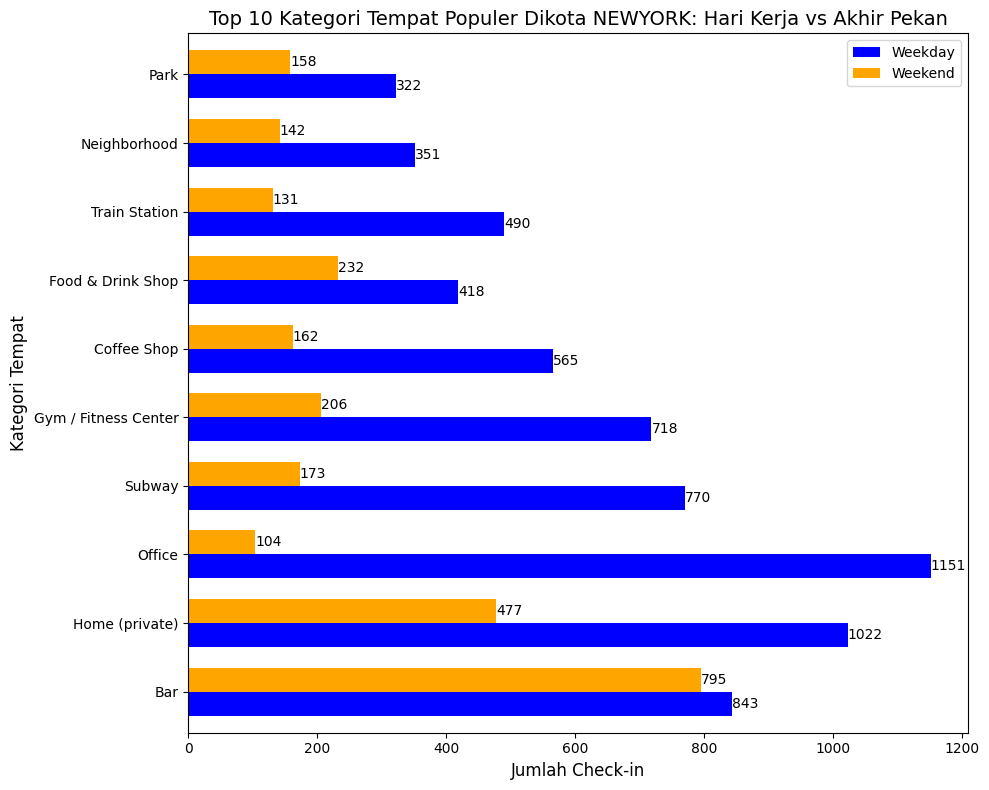

In [ ]:
import matplotlib.pyplot as plt

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Plot horizontal bar chart
ax = filtered_comparison.plot(
    kind='barh',
    figsize=(10, 8),
    color=['blue', 'orange'],
    width=0.7
)

# Tambahkan anotasi
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Tambahkan label dan judul
plt.title('Top 10 Kategori Tempat Populer Dikota NEWYORK: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Jumlah Check-in', fontsize=12)
plt.ylabel('Kategori Tempat', fontsize=12)
plt.tight_layout()
plt.show()


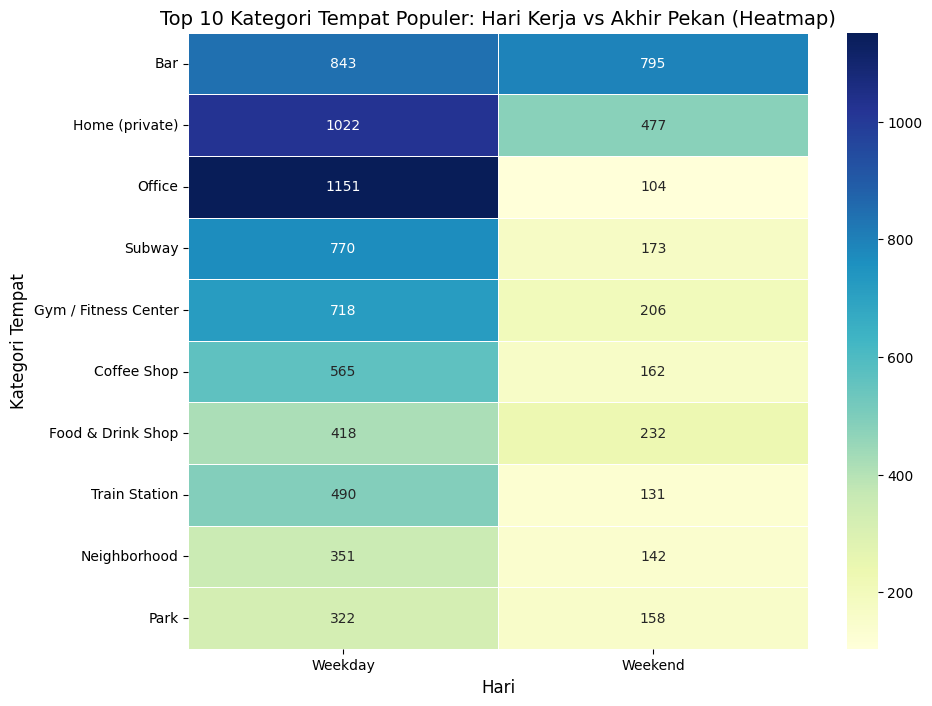

In [ ]:
# prompt: dibuat menjadi heatmap dari plot di atas
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Convert 'Weekday' and 'Weekend' columns to integers for proper annotation
filtered_comparison['Weekday'] = filtered_comparison['Weekday'].astype(int)
filtered_comparison['Weekend'] = filtered_comparison['Weekend'].astype(int)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_comparison, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)  # Use fmt="d" for integers
plt.title('Top 10 Kategori Tempat Populer: Hari Kerja vs Akhir Pekan (Heatmap)', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Kategori Tempat', fontsize=12)
plt.show()

In [ ]:
sampled_data2['day_of_week'] = pd.to_datetime(sampled_data2['utcTimestamp'], errors='coerce').dt.day_name()

# Replace invalid dates with NaT (Not a Time)
sampled_data2['day_of_week'] = sampled_data2['day_of_week'].fillna(pd.NaT)

sampled_data2['is_weekend'] = sampled_data2['day_of_week'].isin(['Saturday', 'Sunday'])

# Jumlah check-in per kategori
weekday_counts = sampled_data2[~sampled_data2['is_weekend']].groupby('venueCategory').size()
weekend_counts = sampled_data2[sampled_data2['is_weekend']].groupby('venueCategory').size()

# Gabungkan untuk visualisasi
popularity_comparison = pd.DataFrame({
    'Weekday': weekday_counts,
    'Weekend': weekend_counts
}).fillna(0)

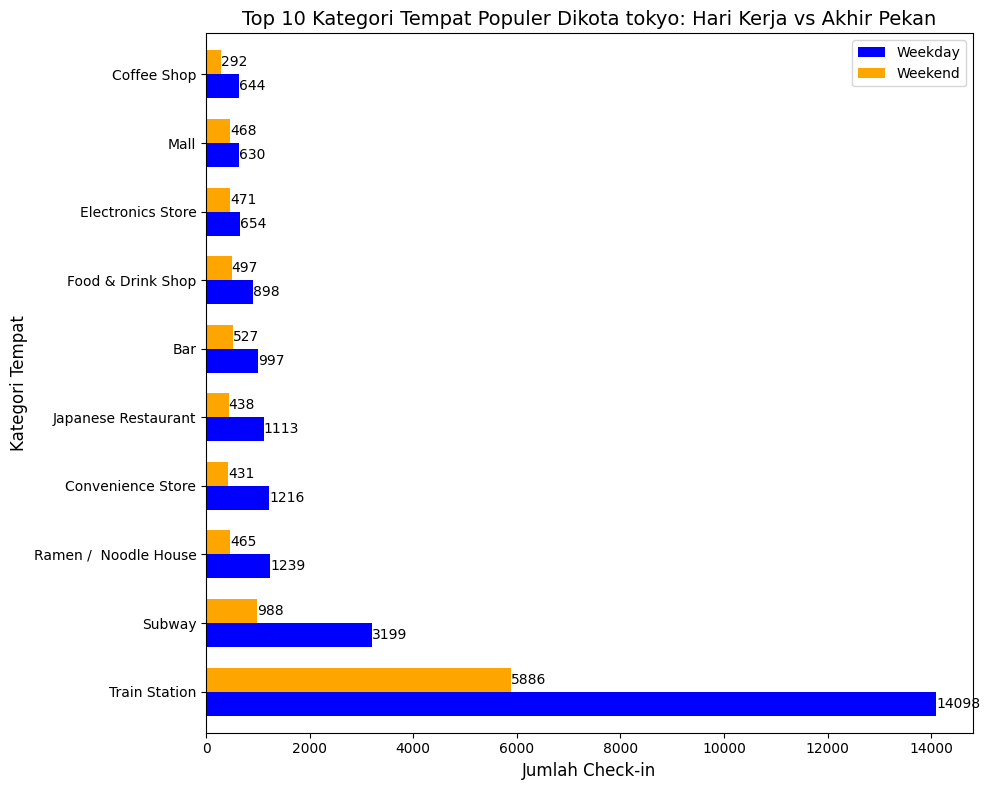

In [ ]:
import matplotlib.pyplot as plt

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Plot horizontal bar chart
ax = filtered_comparison.plot(
    kind='barh',
    figsize=(10, 8),
    color=['blue', 'orange'],
    width=0.7
)

# Tambahkan anotasi
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Tambahkan label dan judul
plt.title('Top 10 Kategori Tempat Populer Dikota tokyo: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Jumlah Check-in', fontsize=12)
plt.ylabel('Kategori Tempat', fontsize=12)
plt.tight_layout()
plt.show()


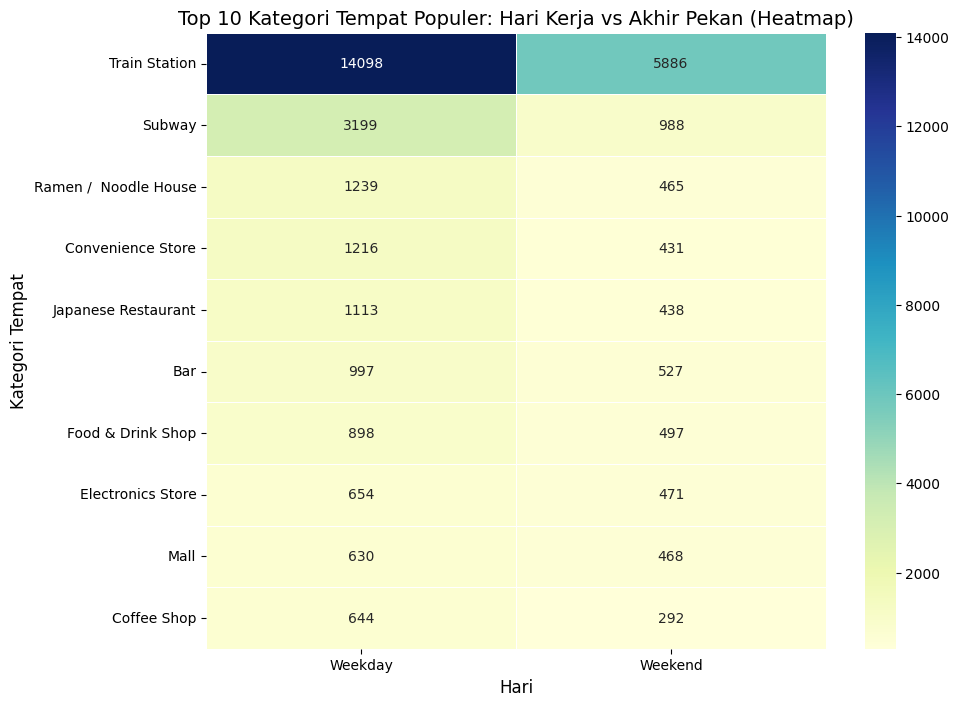

In [ ]:
# prompt: dibuat menjadi heatmap dari plot di atas
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Convert 'Weekday' and 'Weekend' columns to integers for proper annotation
filtered_comparison['Weekday'] = filtered_comparison['Weekday'].astype(int)
filtered_comparison['Weekend'] = filtered_comparison['Weekend'].astype(int)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_comparison, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)  # Use fmt="d" for integers
plt.title('Top 10 Kategori Tempat Populer: Hari Kerja vs Akhir Pekan (Heatmap)', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Kategori Tempat', fontsize=12)
plt.show()

In [ ]:
sampled_data1['utcTimestamp'] = pd.to_datetime(sampled_data1['utcTimestamp'])
sampled_data2['utcTimestamp'] = pd.to_datetime(sampled_data2['utcTimestamp'])
sampled_data1['localTime'] = pd.to_datetime(sampled_data1['utcTimestamp']) + pd.to_timedelta(sampled_data1['timezoneOffset'], unit='m')
sampled_data2['localTime'] = pd.to_datetime(sampled_data2['utcTimestamp']) + pd.to_timedelta(sampled_data2['timezoneOffset'], unit='m')

sampled_data1['hour'] = sampled_data1['localTime'].dt.hour
sampled_data2['hour'] = sampled_data2['localTime'].dt.hour

In [ ]:
ny_data = sampled_data1[sampled_data1['localTime'].notna()]
tokyo_data = sampled_data2[sampled_data2['localTime'].notna()]

# Tempat hiburan malam di New York
ny_nightlife = ny_data[ny_data['venueCategory'].str.contains('Nightlife', na=False)]
ny_nightlife_weekday = ny_nightlife[~ny_nightlife['is_weekend']].shape[0]
ny_nightlife_weekend = ny_nightlife[ny_nightlife['is_weekend']].shape[0]

# Kafe dan pusat perbelanjaan di Tokyo
tokyo_cafes_malls = tokyo_data[tokyo_data['venueCategory'].str.contains('Cafe|Mall|Shopping', na=False)]
tokyo_weekday = tokyo_cafes_malls[~tokyo_cafes_malls['is_weekend']].shape[0]
tokyo_weekend = tokyo_cafes_malls[tokyo_cafes_malls['is_weekend']].shape[0]

# Tampilkan hasil
print("New York - Tempat Hiburan Malam")
print(f"Hari Kerja: {ny_nightlife_weekday} kunjungan")
print(f"Akhir Pekan: {ny_nightlife_weekend} kunjungan\n")

print("Tokyo - Kafe dan Pusat Perbelanjaan")
print(f"Hari Kerja: {tokyo_weekday} kunjungan")
print(f"Akhir Pekan: {tokyo_weekend} kunjungan\n")

New York - Tempat Hiburan Malam
Hari Kerja: 13 kunjungan
Akhir Pekan: 4 kunjungan

Tokyo - Kafe dan Pusat Perbelanjaan
Hari Kerja: 666 kunjungan
Akhir Pekan: 483 kunjungan



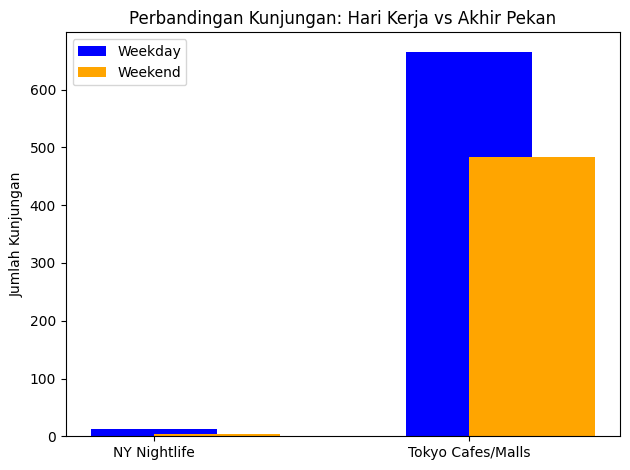

In [ ]:
# Visualisasi
import matplotlib.pyplot as plt

# Data untuk visualisasi
categories = ['NY Nightlife', 'Tokyo Cafes/Malls']
weekday_counts = [ny_nightlife_weekday, tokyo_weekday]
weekend_counts = [ny_nightlife_weekend, tokyo_weekend]

# Plot
x = range(len(categories))
plt.bar(x, weekday_counts, width=0.4, label='Weekday', color='blue', align='center')
plt.bar(x, weekend_counts, width=0.4, label='Weekend', color='orange', align='edge')

# Label dan judul
plt.xticks(x, categories)
plt.ylabel('Jumlah Kunjungan')
plt.title('Perbandingan Kunjungan: Hari Kerja vs Akhir Pekan')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Data untuk visualisasi
categories = ['NY Nightlife', 'Tokyo Cafes/Malls']
weekday_counts = [ny_nightlife_weekday, tokyo_weekday]
weekend_counts = [ny_nightlife_weekend, tokyo_weekend]

# Membuat bar chart terpisah untuk masing-masing kategori
fig = go.Figure()

# Tambahkan data hari kerja untuk NY Nightlife
fig.add_trace(go.Bar(
    x=['NY Nightlife'],
    y=[ny_nightlife_weekday],
    name='Weekday',
    marker_color='blue',
    text=[ny_nightlife_weekday],
    textposition='outside'
))

# Tambahkan data akhir pekan untuk NY Nightlife
fig.add_trace(go.Bar(
    x=['NY Nightlife'],
    y=[ny_nightlife_weekend],
    name='Weekend',
    marker_color='orange',
    text=[ny_nightlife_weekend],
    textposition='outside'
))

# Tambahkan data hari kerja untuk Tokyo Cafes/Malls
fig.add_trace(go.Bar(
    x=['Tokyo Cafes/Malls'],
    y=[tokyo_weekday],
    name='Weekday',
    marker_color='blue',
    text=[tokyo_weekday],
    textposition='outside'
))

# Tambahkan data akhir pekan untuk Tokyo Cafes/Malls
fig.add_trace(go.Bar(
    x=['Tokyo Cafes/Malls'],
    y=[tokyo_weekend],
    name='Weekend',
    marker_color='orange',
    text=[tokyo_weekend],
    textposition='outside'
))

# Layout
fig.update_layout(
    title='Perbandingan Kunjungan: Hari Kerja vs Akhir Pekan untuk Setiap Kategori',
    xaxis_title='Kategori',
    yaxis_title='Jumlah Kunjungan',
    barmode='group',
    legend=dict(title="Hari"),
    template='plotly_white'
)

# Tampilkan plot
fig.show()


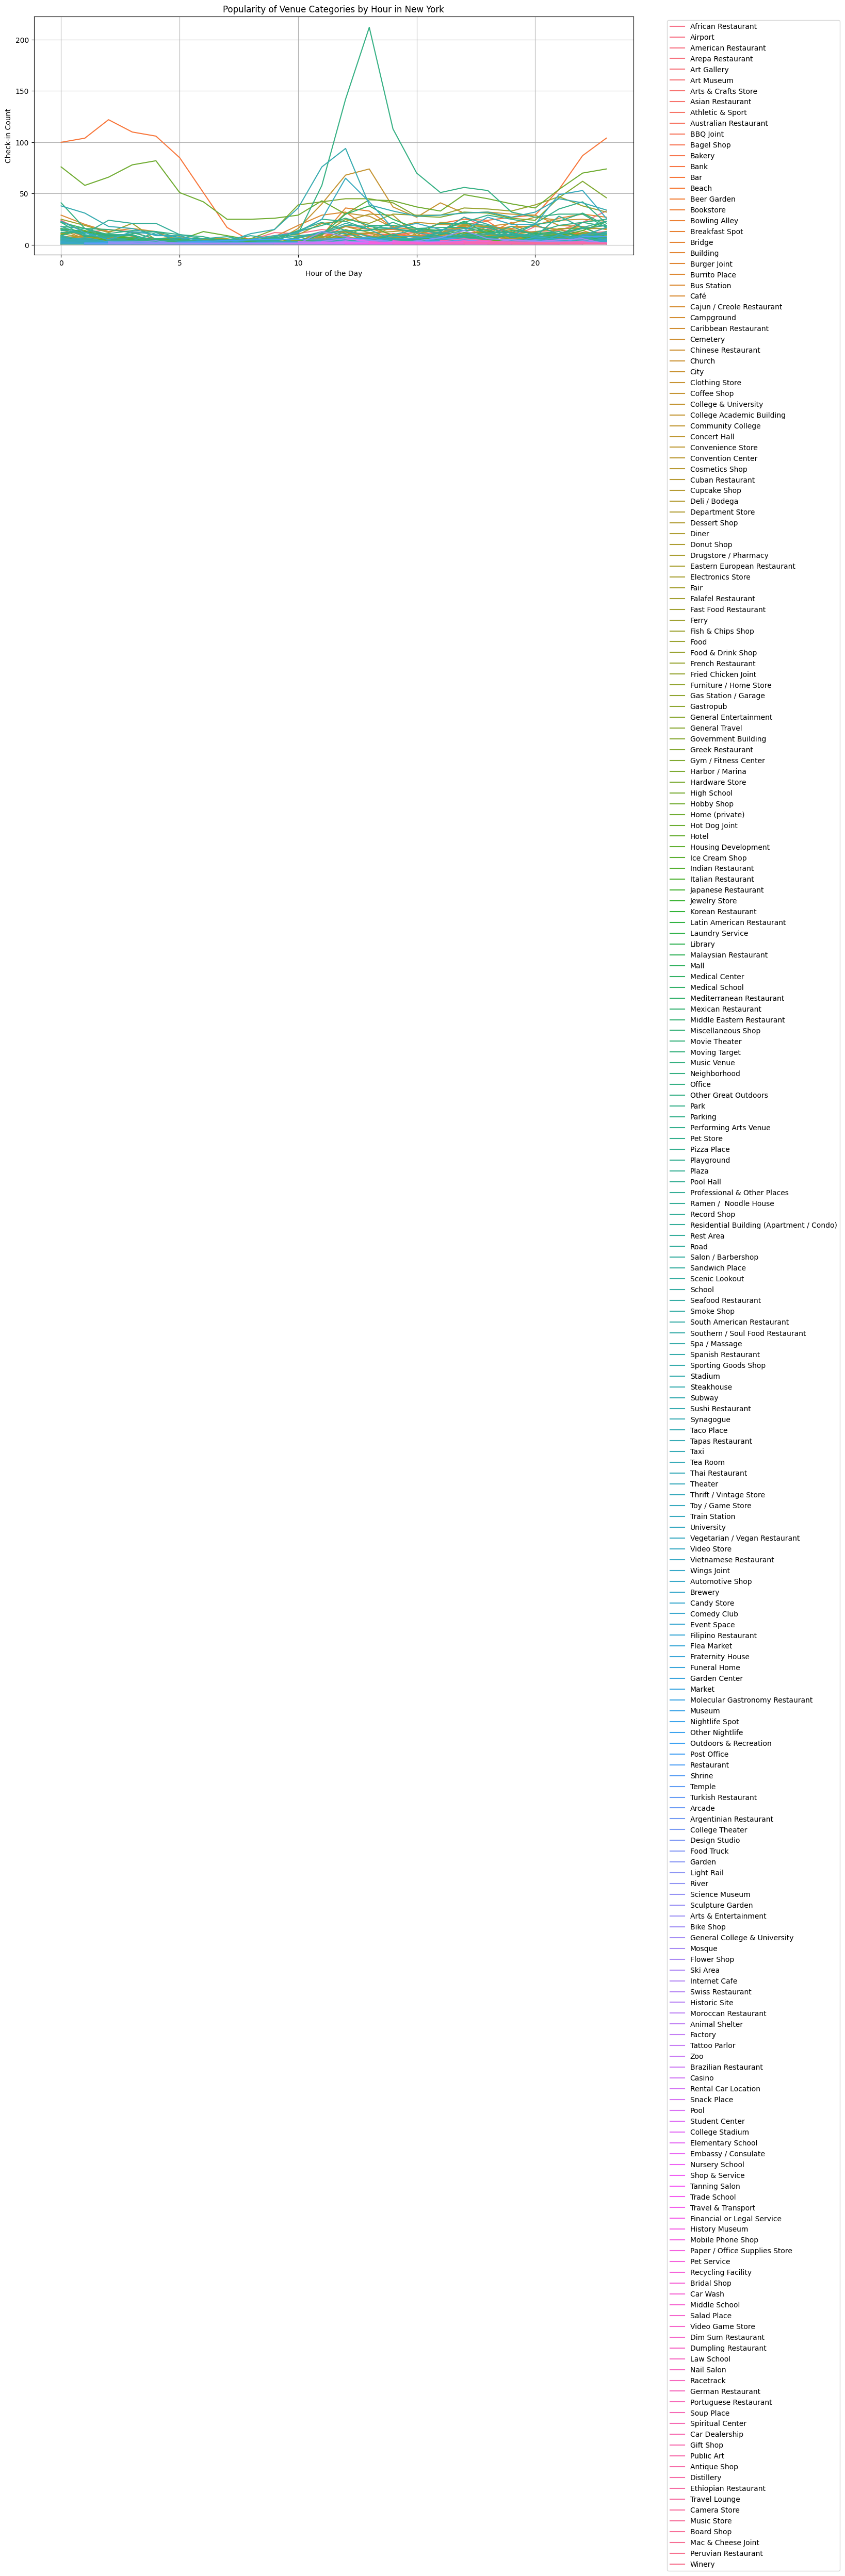

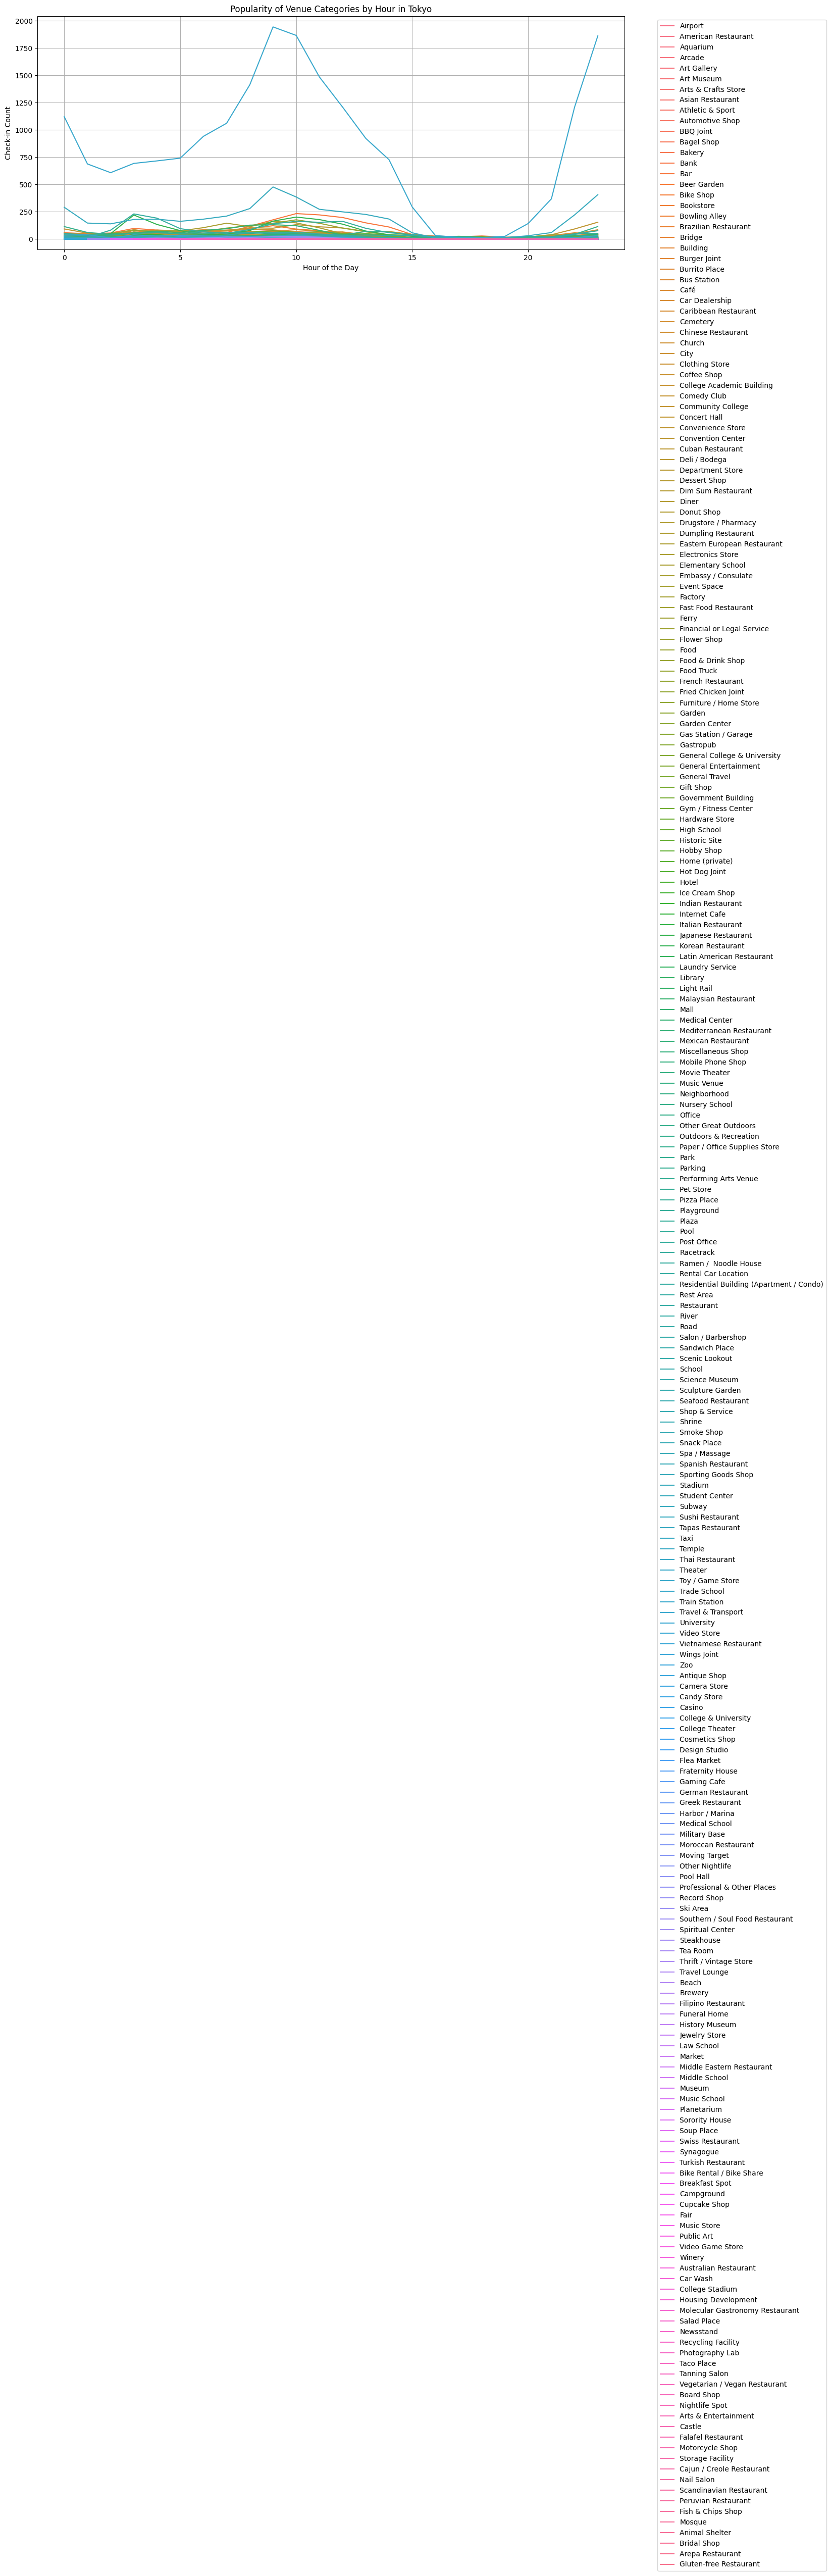

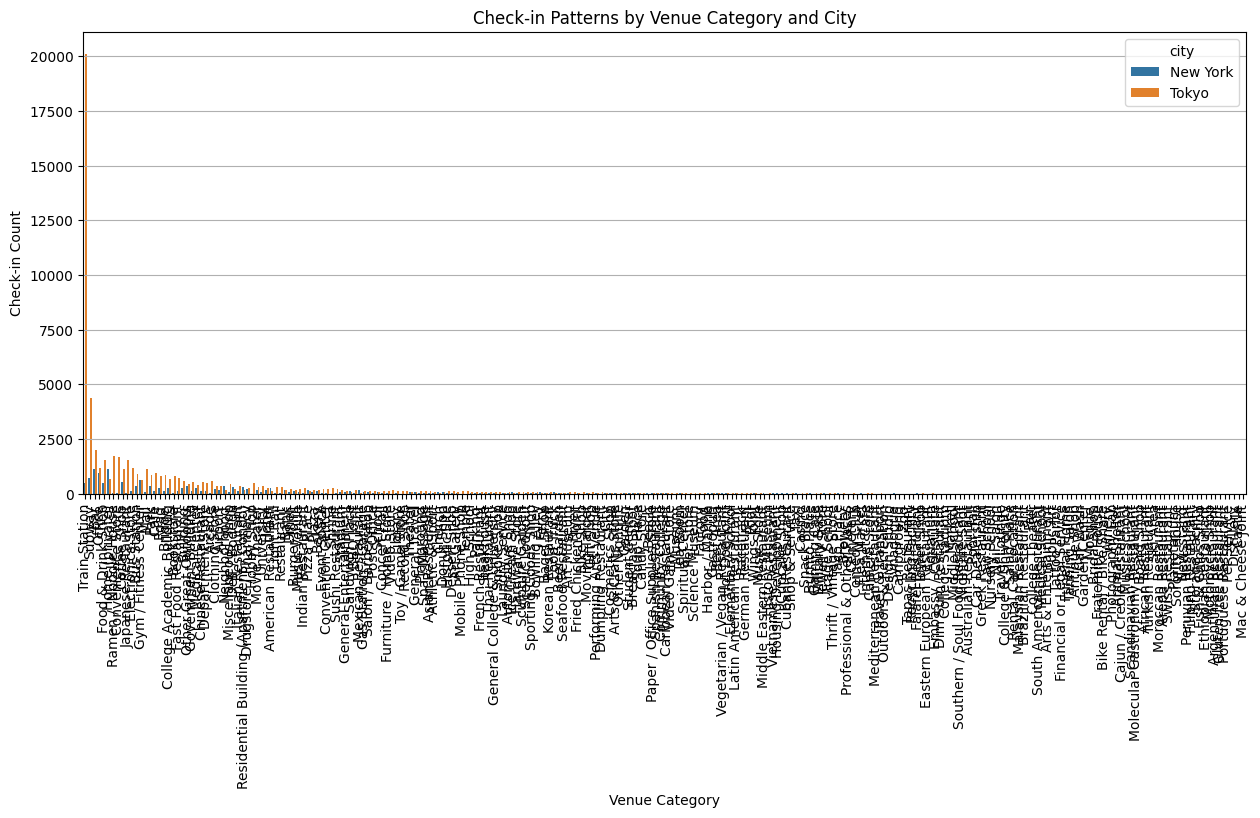

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sampled data (assumed as dataframes sampled_data1 and sampled_data2)
# sampled_data1 = data1.sample(frac=0.1, random_state=42)
# sampled_data2 = data2.sample(frac=0.1, random_state=42)

# Combine data from both cities
data_combined = pd.concat([sampled_data1, sampled_data2], ignore_index=True)

# Convert utcTimestamp to datetime for easier manipulation
data_combined['utcTimestamp'] = pd.to_datetime(data_combined['utcTimestamp'])

# Extract hour of check-in
data_combined['hour'] = data_combined['utcTimestamp'].dt.hour

# Extract city information based on timezone offset (assume -240 for New York and other values for Tokyo)
data_combined['city'] = data_combined['timezoneOffset'].apply(lambda x: 'New York' if x == -240 else 'Tokyo')

# Group data by hour, city, and venueCategory for analysis
hourly_popularity = data_combined.groupby(['hour', 'city', 'venueCategory']).size().reset_index(name='count')

# 1. Analyze popular categories at specific times of the day
def plot_popularity_by_time(city):
    city_data = hourly_popularity[hourly_popularity['city'] == city]
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=city_data, x='hour', y='count', hue='venueCategory')
    plt.title(f'Popularity of Venue Categories by Hour in {city}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Check-in Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Plot for New York
plot_popularity_by_time('New York')

# Plot for Tokyo
plot_popularity_by_time('Tokyo')

# 2. Check-in patterns per category by city
def plot_category_distribution():
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data_combined, x='venueCategory', hue='city', order=data_combined['venueCategory'].value_counts().index)
    plt.title('Check-in Patterns by Venue Category and City')
    plt.xlabel('Venue Category')
    plt.ylabel('Check-in Count')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

plot_category_distribution()


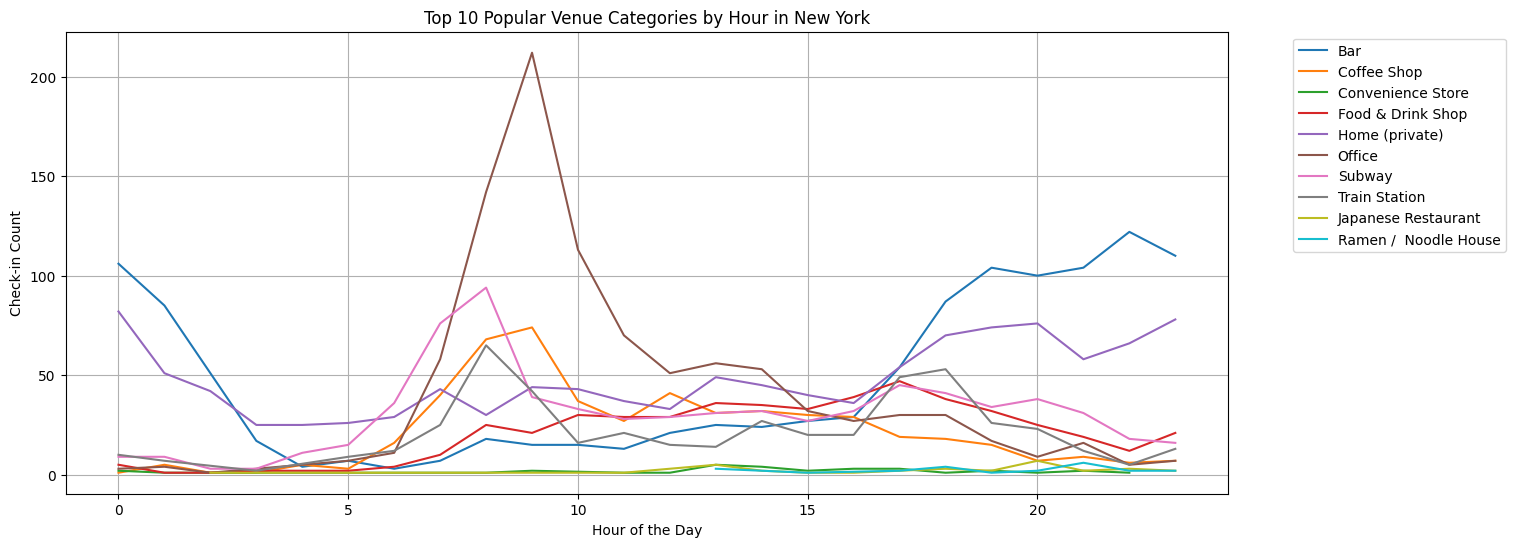

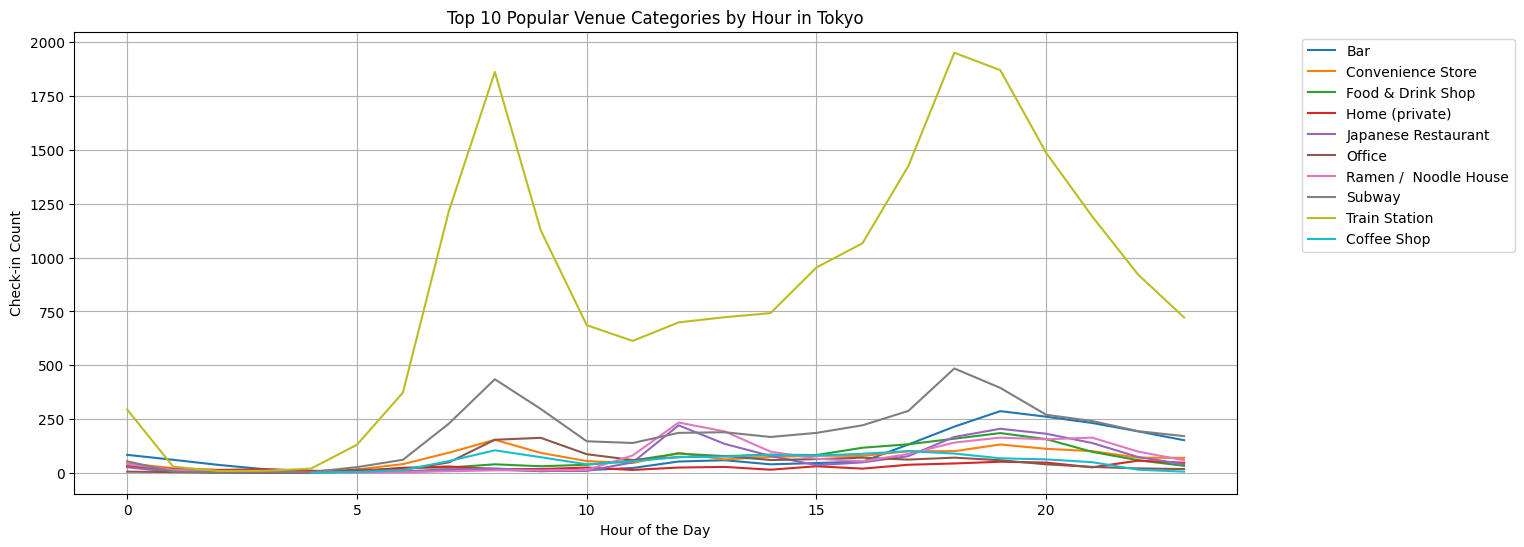

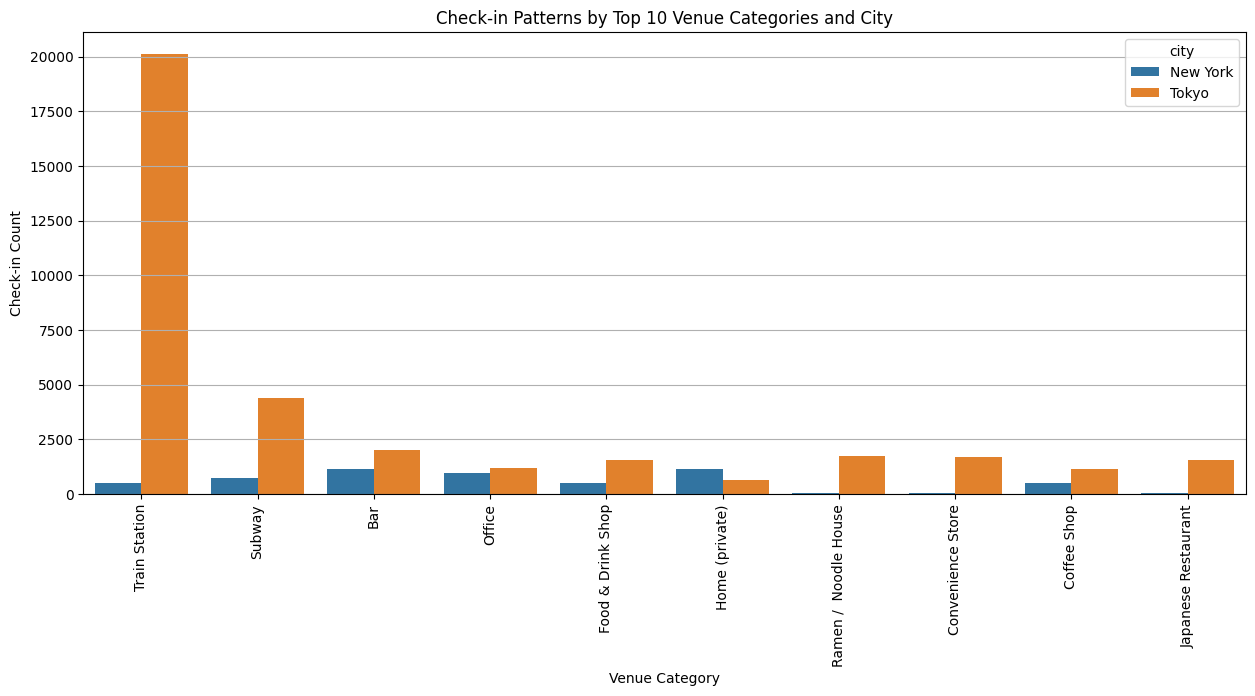

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sampled data (assumed as dataframes sampled_data1 and sampled_data2)
# sampled_data1 = data1.sample(frac=0.1, random_state=42)
# sampled_data2 = data2.sample(frac=0.1, random_state=42)

# Combine data from both cities
data_combined = pd.concat([sampled_data1, sampled_data2], ignore_index=True)


# Extract city information based on timezone offset (assume -240 for New York and other values for Tokyo)
data_combined['city'] = data_combined['timezoneOffset'].apply(lambda x: 'New York' if x == -240 else 'Tokyo')

# Group data by hour, city, and venueCategory for analysis
hourly_popularity = data_combined.groupby(['hour', 'city', 'venueCategory']).size().reset_index(name='count')

# Identify top 10 categories by overall count
top_categories = data_combined['venueCategory'].value_counts().head(10).index
filtered_data = hourly_popularity[hourly_popularity['venueCategory'].isin(top_categories)]

# 1. Analyze popular categories at specific times of the day (Top 10 Categories)
def plot_top_categories_by_time(city):
    city_data = filtered_data[filtered_data['city'] == city]
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=city_data, x='hour', y='count', hue='venueCategory')
    plt.title(f'Top 10 Popular Venue Categories by Hour in {city}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Check-in Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Plot for New York
plot_top_categories_by_time('New York')

# Plot for Tokyo
plot_top_categories_by_time('Tokyo')

# 2. Check-in patterns per category by city
def plot_category_distribution():
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data_combined[data_combined['venueCategory'].isin(top_categories)], x='venueCategory', hue='city', order=top_categories)
    plt.title('Check-in Patterns by Top 10 Venue Categories and City')
    plt.xlabel('Venue Category')
    plt.ylabel('Check-in Count')
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

plot_category_distribution()


In [ ]:
# Identifikasi kategori populer di sampled_data1
top_categories1 = sampled_data1['kategori_tempat'].value_counts().head(10).index

# Filter data berdasarkan kategori populer
filtered_data1 = sampled_data1[sampled_data1['kategori_tempat'].isin(top_categories1)]

# Add a 'count' column with value 1 to represent each check-in
filtered_data1['count'] = 1

# Pivot data untuk heatmap
heatmap_data1 = filtered_data1.pivot_table(
    index='hour',  # Baris: jam
    columns='kategori_tempat',  # Kolom: kategori tempat
    values='count',  # Nilai: jumlah check-in
    aggfunc='sum',
    fill_value=0
)


In [ ]:
# Identifikasi kategori populer di sampled_data2
# Identifikasi kategori populer di sampled_data2
top_categories2 = sampled_data2['kategori_tempat'].value_counts().head(10).index

# Filter data berdasarkan kategori populer
filtered_data2 = sampled_data2[sampled_data2['kategori_tempat'].isin(top_categories2)]

# **Add this line to extract hour from utcTimestamp, just as you did for filtered_data1:**
filtered_data2['hour'] = pd.to_datetime(filtered_data2['utcTimestamp']).dt.hour

filtered_data2['count'] = 1
# Pivot data untuk heatmap
heatmap_data2 = filtered_data2.pivot_table(
    index='hour',  # Baris: jam
    columns='kategori_tempat',  # Kolom: kategori tempat
    values='count',  # Nilai: jumlah check-in
    aggfunc='sum',
    fill_value=0
)

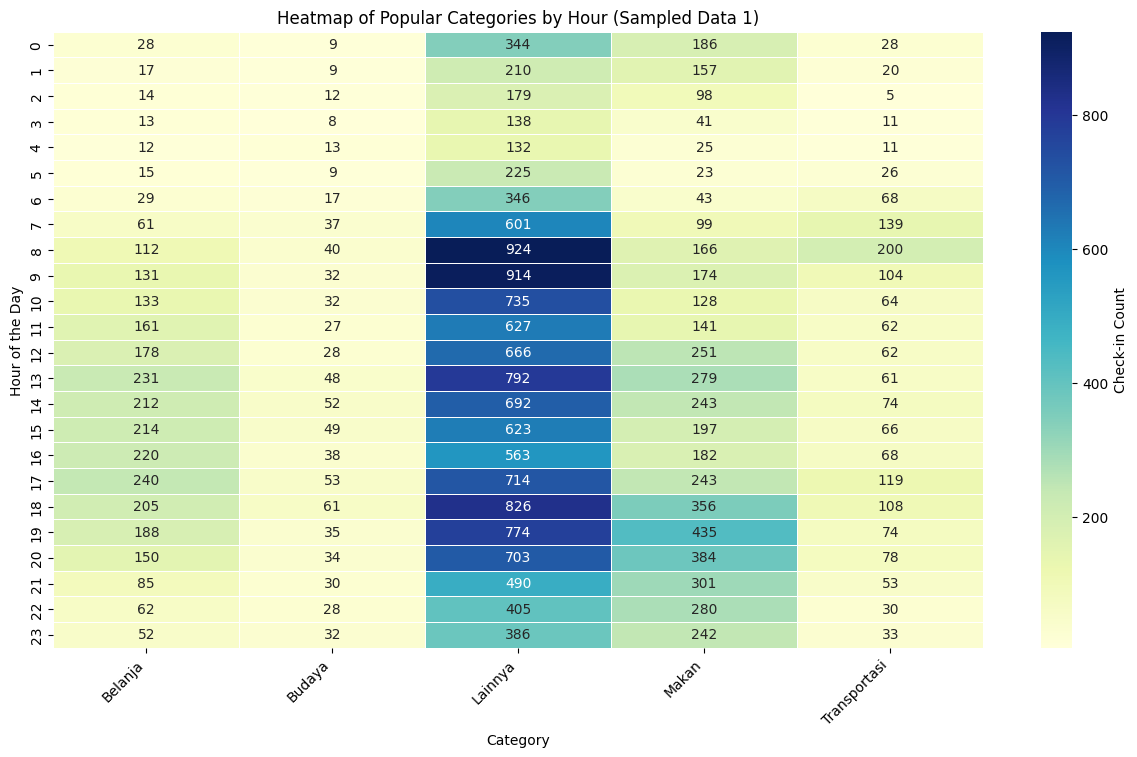

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    heatmap_data1,
    cmap='YlGnBu',
    annot=True,  # Menampilkan nilai di setiap sel
    fmt='d',  # Format angka (integer)
    linewidths=0.5,
    cbar_kws={'label': 'Check-in Count'}
)
plt.title('Heatmap of Popular Categories by Hour (Sampled Data 1)')
plt.xlabel('Category')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45, ha='right')
plt.show()


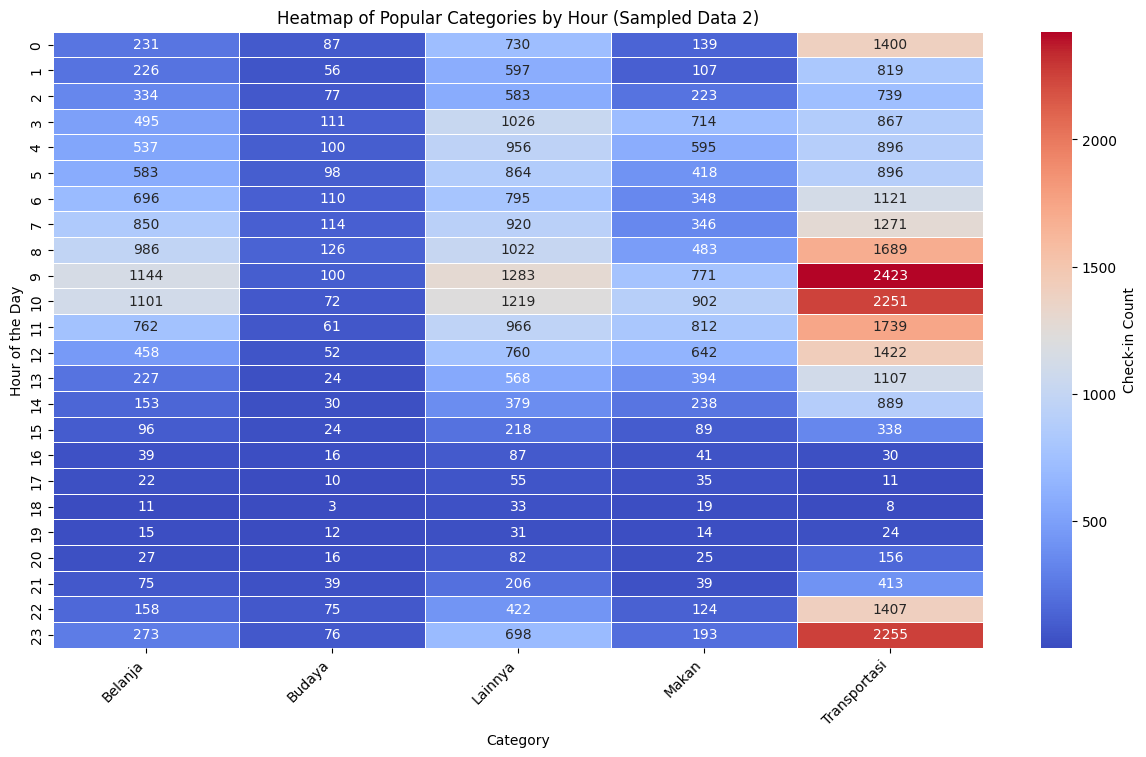

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(
    heatmap_data2,
    cmap='coolwarm',  # Palet warna lain untuk variasi
    annot=True,
    fmt='d',
    linewidths=0.5,
    cbar_kws={'label': 'Check-in Count'}
)
plt.title('Heatmap of Popular Categories by Hour (Sampled Data 2)')
plt.xlabel('Category')
plt.ylabel('Hour of the Day')
plt.xticks(rotation=45, ha='right')
plt.show()


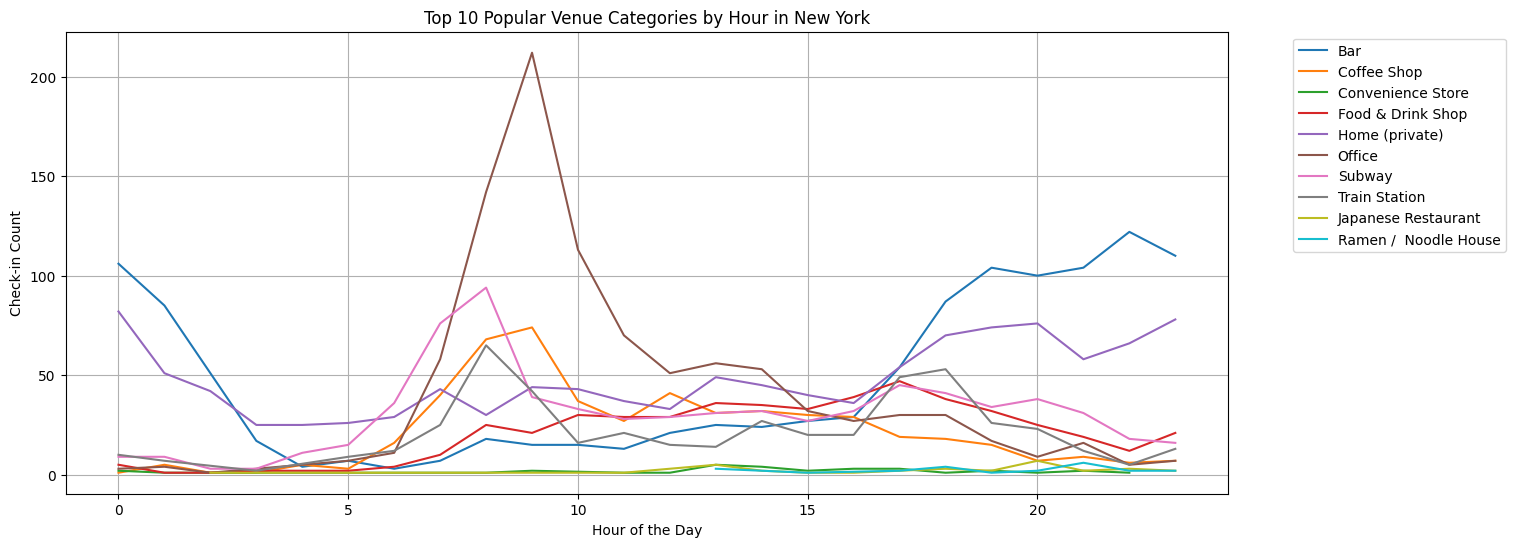

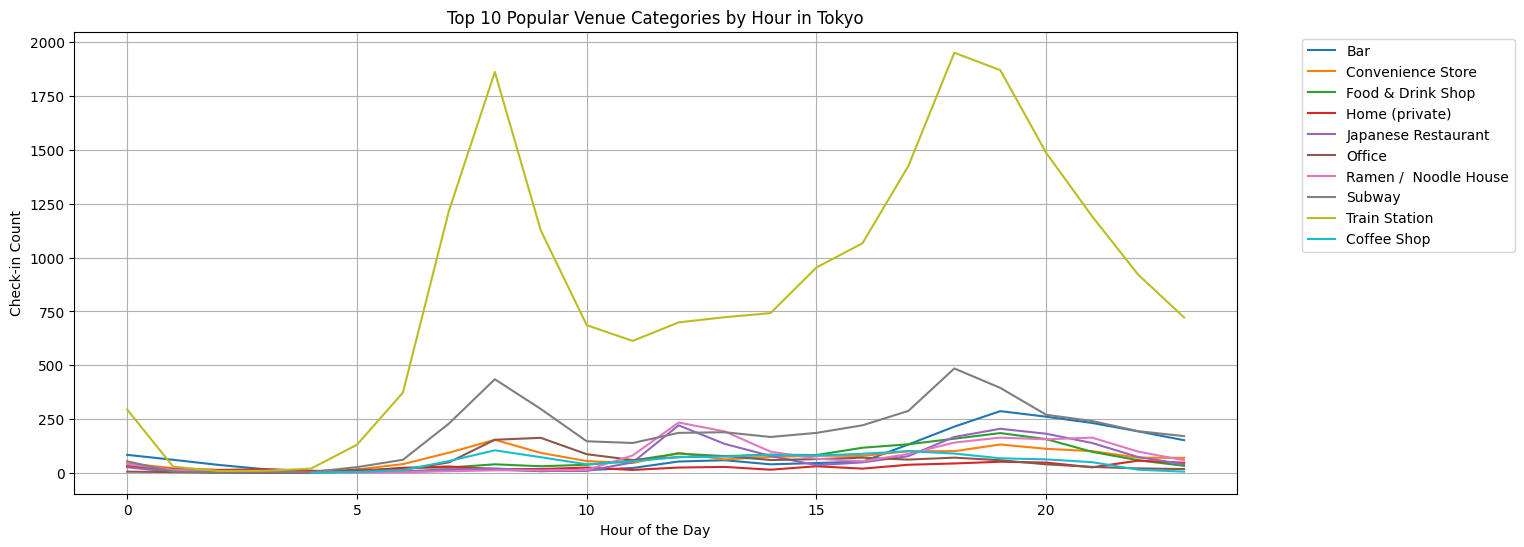

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code) ...

# Assuming 'hourly_popularity' DataFrame is already created as in the previous code

# Identify top 10 categories by overall count
top_categories = data_combined['venueCategory'].value_counts().head(10).index
filtered_data = hourly_popularity[hourly_popularity['venueCategory'].isin(top_categories)]

# 1. Analyze popular categories at specific times of the day (Top 10 Categories)
def plot_top_categories_by_time(city):
    city_data = filtered_data[filtered_data['city'] == city]
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=city_data, x='hour', y='count', hue='venueCategory')
    plt.title(f'Top 10 Popular Venue Categories by Hour in {city}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Check-in Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Plot for New York
plot_top_categories_by_time('New York')

# Plot for Tokyo
plot_top_categories_by_time('Tokyo')

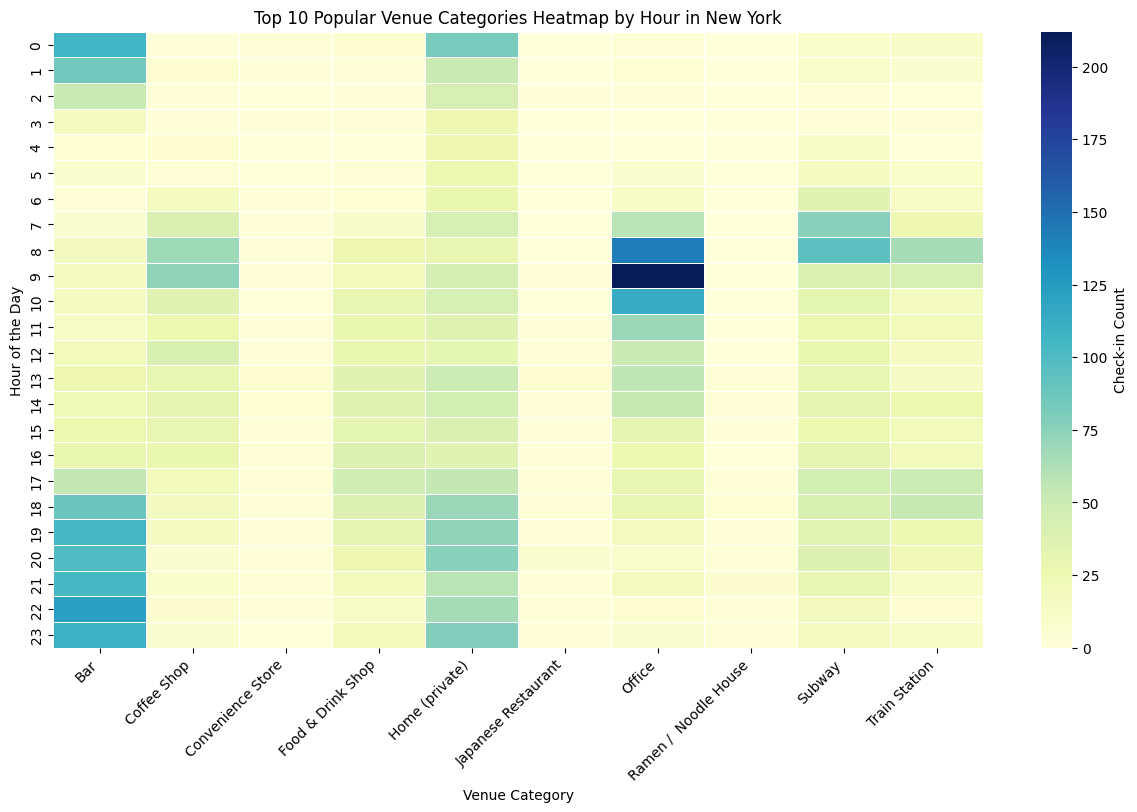

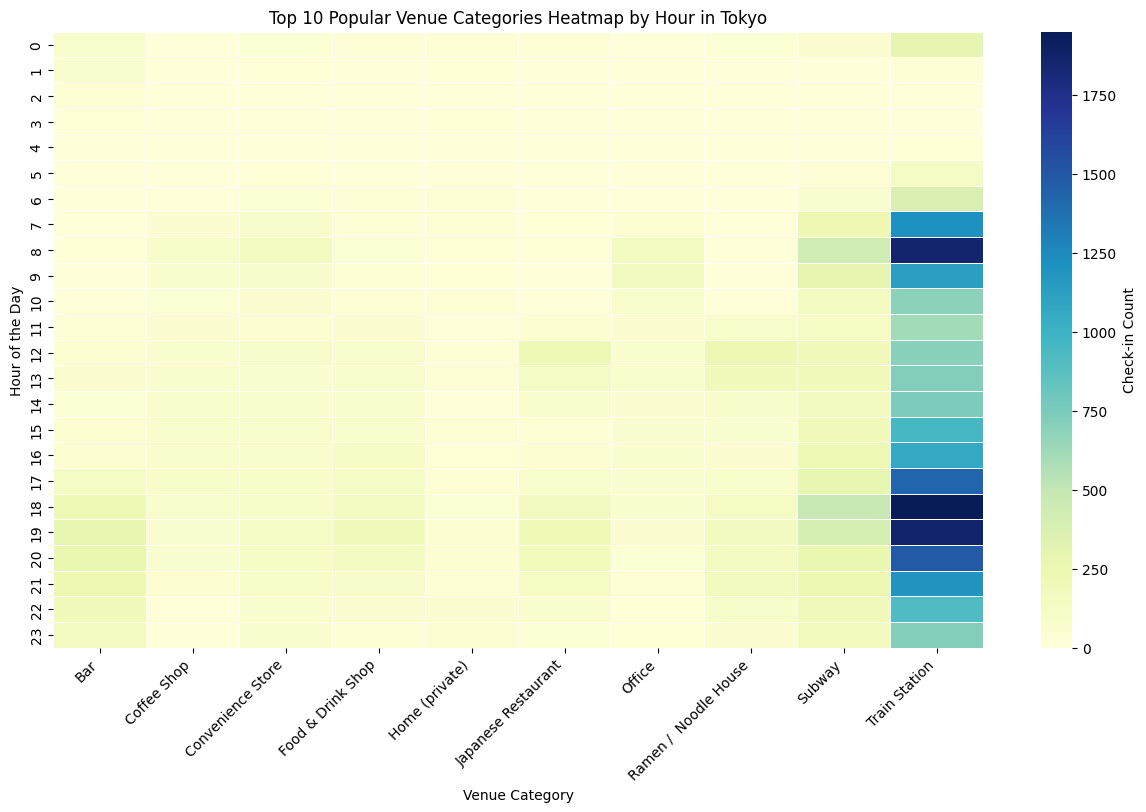

In [ ]:
def plot_top_categories_heatmap(city):
    city_data = filtered_data[filtered_data['city'] == city]

    # Pivot the data to create a matrix with 'hour' as rows, 'venueCategory' as columns, and 'count' as values
    heatmap_data = city_data.pivot_table(
        index='hour',
        columns='venueCategory',
        values='count',
        aggfunc='sum',
        fill_value=0
    )

    # Plot heatmap
    plt.figure(figsize=(15, 8))
    sns.heatmap(
        heatmap_data,
        cmap='YlGnBu',
        linewidths=0.5,
        annot=False,
        cbar_kws={'label': 'Check-in Count'}
    )
    plt.title(f'Top 10 Popular Venue Categories Heatmap by Hour in {city}')
    plt.xlabel('Venue Category')
    plt.ylabel('Hour of the Day')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot heatmap for New York
plot_top_categories_heatmap('New York')

# Plot heatmap for Tokyo
plot_top_categories_heatmap('Tokyo')


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data untuk kota yang dipilih
def plot_combined_bar_line(city):
    city_data = filtered_data[filtered_data['city'] == city]

    # Ambil 10 kategori teratas berdasarkan total check-in
    top_categories = city_data.groupby('venueCategory')['count'].sum().nlargest(10).index
    top_data = city_data[city_data['venueCategory'].isin(top_categories)]

    # Grupkan data berdasarkan kategori dan waktu
    summary = top_data.groupby(['hour', 'venueCategory'])['count'].sum().unstack().fillna(0)
    top_categories_sorted = summary.sum(axis=0).sort_values(ascending=False).index

    # Inisialisasi plot
    fig = go.Figure()

    # Tambahkan bar untuk 5 kategori teratas
    for category in top_categories_sorted[:5]:
        fig.add_trace(go.Bar(
            x=summary.index,
            y=summary[category],
            name=category,
            marker=dict(line=dict(width=0.5)),
        ))

    # Tambahkan garis putus-putus untuk 5 kategori berikutnya
    for category in top_categories_sorted[5:]:
        fig.add_trace(go.Scatter(
            x=summary.index,
            y=summary[category],
            mode='lines+markers',
            name=category,
            line=dict(dash='dash', width=2),
        ))

    # Konfigurasi tata letak plot
    fig.update_layout(
        title=f'Top 10 Popular Venue Categories by Hour in {city}',
        xaxis=dict(title='Hour of the Day'),
        yaxis=dict(title='Check-in Count'),
        legend=dict(title='Venue Categories'),
        barmode='group',
        template='plotly_white'
    )

    # Tampilkan plot
    fig.show()

# Plot untuk New York
plot_combined_bar_line('New York')

# Plot untuk Tokyo
plot_combined_bar_line('Tokyo')


In [ ]:
import plotly.graph_objects as go

# Buat Plotly figure
fig = go.Figure()

# Tambahkan bar untuk 5 kategori teratas dengan warna yang lebih seragam
colors_weekday = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Contoh warna Weekday
colors_weekend = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']  # Contoh warna Weekend

for i in range(5):
    fig.add_trace(go.Bar(
        y=[top_categories[i]],
        x=[filtered_comparison['Sampled Data 1'].iloc[i]],
        name=f'Weekday - {top_categories[i]}',
        orientation='h',
        marker_color=colors_weekday[i]
    ))
    fig.add_trace(go.Bar(
        y=[top_categories[i]],
        x=[filtered_comparison['Sampled Data 2'].iloc[i]],
        name=f'Weekend - {top_categories[i]}',
        orientation='h',
        marker_color=colors_weekend[i]
    ))

# Tambahkan line plot untuk 5 kategori berikutnya dengan garis putus-putus
line_colors = ['#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']  # Warna garis

for i in range(5, min(10, num_top_categories)): # Iterate from 5 to 10 or the number of categories, whichever is smaller
    fig.add_trace(go.Scatter(
        y=[top_categories[i], top_categories[i]],
        x=[filtered_comparison['Sampled Data 1'].iloc[i], filtered_comparison['Sampled Data 2'].iloc[i]],
        mode='lines+markers',
        name=f'{top_categories[i]}',
        line=dict(dash='dash'),
        marker=dict(size=8)
    ))
# Update layout
fig.update_layout(
    title='Top 10 Kategori Tempat Populer: Sampled Data 1 vs Sampled Data 2',
    barmode='stack',  # 'group' jika ingin bar terpisah
    xaxis_title='Jumlah Check-in',
    yaxis_title='Kategori Tempat',
    legend_title='Keterangan',
    template='plotly_white',
    margin=dict(l=150),  # Memberi ruang lebih untuk label y
)

# Tampilkan plot
fig.show()


In [ ]:
# Hitung jumlah check-in per kategori untuk kedua dataset
popularity_sampled_data1 = sampled_data1.groupby('kategori_tempat')['venueCategory'].count()  # Use .count() to get check-in counts
popularity_sampled_data2 = sampled_data2.groupby('kategori_tempat')['venueCategory'].count()  # Use .count() to get check-in counts

# Gabungkan hasil dari kedua dataset untuk perbandingan
popularity_comparison = pd.DataFrame({
    'Sampled Data 1': popularity_sampled_data1,
    'Sampled Data 2': popularity_sampled_data2
}).fillna(0)

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

In [ ]:
import plotly.graph_objects as go

# ... (Your existing code to calculate filtered_comparison and top_categories) ...

# Buat Plotly figure
fig = go.Figure()

# Tambahkan bar untuk 5 kategori teratas dengan warna
num_top_categories = len(top_categories) # Get the actual number of top categories

for i in range(min(5, num_top_categories)): # Iterate up to 5 or the number of categories, whichever is smaller
    fig.add_trace(go.Bar(
        y=[top_categories[i]],
        x=[filtered_comparison['Sampled Data 1'].iloc[i]],
        name=f'Sampled Data 1 - {top_categories[i]}',
        orientation='h',
        marker_color='blue'
    ))
    fig.add_trace(go.Bar(
        y=[top_categories[i]],
        x=[filtered_comparison['Sampled Data 2'].iloc[i]],
        name=f'Sampled Data 2 - {top_categories[i]}',
        orientation='h',
        marker_color='orange'
    ))

# Tambahkan line plot untuk 5 kategori berikutnya dengan garis putus-putus
for i in range(5, min(10, num_top_categories)): # Iterate from 5 to 10 or the number of categories, whichever is smaller
    fig.add_trace(go.Scatter(
        y=[top_categories[i], top_categories[i]],
        x=[filtered_comparison['Sampled Data 1'].iloc[i], filtered_comparison['Sampled Data 2'].iloc[i]],
        mode='lines+markers',
        name=f'{top_categories[i]}',
        line=dict(dash='dash'),
        marker=dict(size=8)
    ))

# Update layout (rest of the code remains the same)

# Update layout
fig.update_layout(
    title='Top 10 Kategori Tempat Populer: Sampled Data 1 vs Sampled Data 2',
    barmode='stack',  # 'group' jika ingin bar terpisah
    xaxis_title='Jumlah Check-in',
    yaxis_title='Kategori Tempat',
    legend_title='Keterangan',
    template='plotly_white'
)
fig.show()


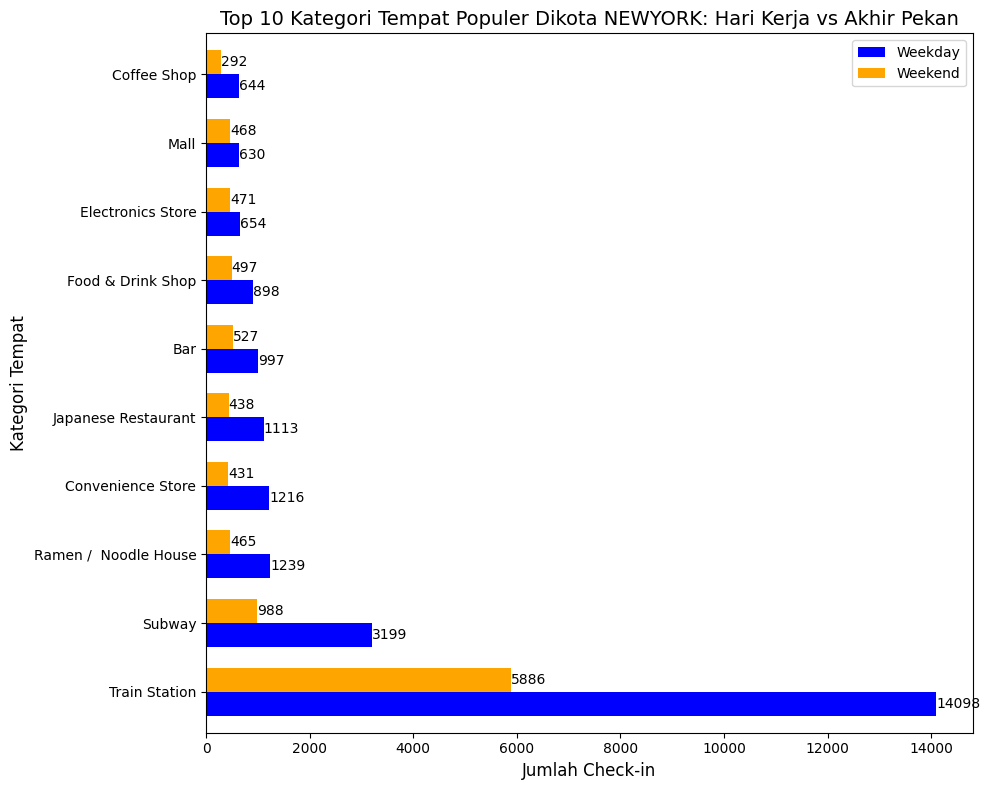

In [ ]:
# prompt: buat diatas menjadi data newyork jangan tokyo

# ... (Your existing code) ...

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Plot horizontal bar chart
ax = filtered_comparison.plot(
    kind='barh',
    figsize=(10, 8),
    color=['blue', 'orange'],
    width=0.7
)

# Tambahkan anotasi
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Tambahkan label dan judul
plt.title('Top 10 Kategori Tempat Populer Dikota NEWYORK: Hari Kerja vs Akhir Pekan', fontsize=14) #ganti judul menjadi newyork
plt.xlabel('Jumlah Check-in', fontsize=12)
plt.ylabel('Kategori Tempat', fontsize=12)
plt.tight_layout()
plt.show()

# ... (rest of your code)

In [ ]:
# prompt: # prompt: lanjut yang newyork seperti yang di atas

# Assuming 'popularity_comparison' DataFrame is already created and contains 'Weekday' and 'Weekend' columns for New York data

# Ambil 10 kategori dengan jumlah check-in tertinggi di New York
top_categories_ny = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison_ny = popularity_comparison.loc[top_categories_ny]

# Buat Plotly figure untuk New York
fig_ny = go.Figure()

# Tambahkan bar untuk 5 kategori teratas dengan warna
for i in range(5):
    fig_ny.add_trace(go.Bar(
        y=[top_categories_ny[i]],
        x=[filtered_comparison_ny['Weekday'].iloc[i]],
        name=f'Weekday - {top_categories_ny[i]}',
        orientation='h',
        marker_color='blue'
    ))
    fig_ny.add_trace(go.Bar(
        y=[top_categories_ny[i]],
        x=[filtered_comparison_ny['Weekend'].iloc[i]],
        name=f'Weekend - {top_categories_ny[i]}',
        orientation='h',
        marker_color='orange'
    ))

# Tambahkan line plot untuk 5 kategori berikutnya dengan garis putus-putus
for i in range(5, 10):
    fig_ny.add_trace(go.Scatter(
        y=[top_categories_ny[i], top_categories_ny[i]],
        x=[filtered_comparison_ny['Weekday'].iloc[i], filtered_comparison_ny['Weekend'].iloc[i]],
        mode='lines+markers',
        name=f'{top_categories_ny[i]}',
        line=dict(dash='dash'),
        marker=dict(size=8)
    ))

# Update layout untuk New York
fig_ny.update_layout(
    title='Top 10 Kategori Tempat Populer di New York: Hari Kerja vs Akhir Pekan',
    barmode='stack',
    xaxis_title='Jumlah Check-in',
    yaxis_title='Kategori Tempat',
    legend_title='Keterangan',
    template='plotly_white'
)
fig_ny.show()

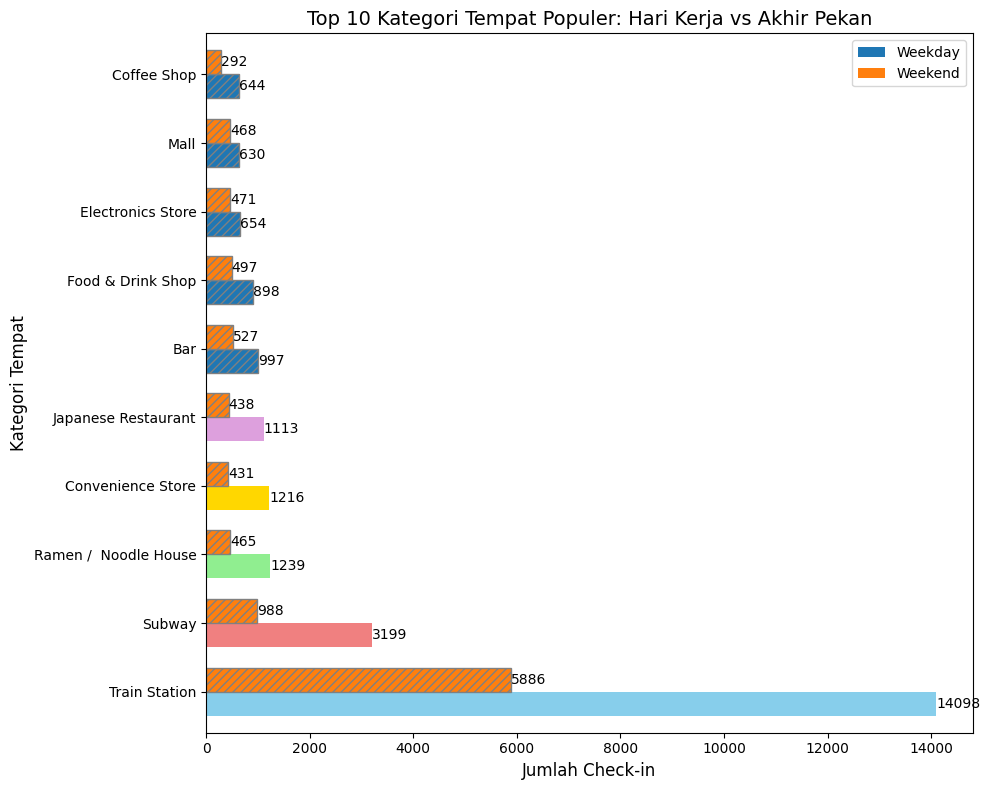

In [ ]:
# prompt: buatkan 10 top di atas tapi  yang 5 teratas bewarna dan 5 setelahnya garis putus putus dan tidak bewarna

import pandas as pd
import matplotlib.pyplot as plt

# ... (Your existing code) ...

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Plot horizontal bar chart
ax = filtered_comparison.plot(
    kind='barh',
    figsize=(10, 8),
    width=0.7
)

# Warna untuk 5 teratas
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum'] + ['white'] * 5

# Set warna bar
for i, bar in enumerate(ax.patches):
    if i < 5:
        bar.set_facecolor(colors[i])
    else:
      bar.set_edgecolor('gray') # Set warna garis tepi untuk bar setelah ke 5
      bar.set_hatch('////') # Tambah garis putus-putus untuk bar setelah ke-5

# Tambahkan anotasi
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# Tambahkan label dan judul
plt.title('Top 10 Kategori Tempat Populer: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Jumlah Check-in', fontsize=12)
plt.ylabel('Kategori Tempat', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# ... (Your existing code for data loading and preprocessing) ...

# Assuming 'sampled_data1' and 'sampled_data2' are your dataframes

# ... (Your existing code for categorization, time period and weekend identification) ...


def plot_popularity(df, city_name):
    # Group data by weekend/weekday and venue category
    weekday_counts = df[~df['is_weekend']].groupby(['kategori_tempat', 'time_period']).size().unstack(fill_value=0)
    weekend_counts = df[df['is_weekend']].groupby(['kategori_tempat', 'time_period']).size().unstack(fill_value=0)

    # Combine for visualization
    popularity_comparison = pd.DataFrame({
        'Weekday': weekday_counts.sum(axis=1),  # Summing counts across time periods for weekdays
        'Weekend': weekend_counts.sum(axis=1)   # Summing counts across time periods for weekends
    })

    # Plot
    fig = px.bar(popularity_comparison,
                 x=popularity_comparison.index,
                 y=['Weekday', 'Weekend'],
                 title=f'Perbedaan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan {city_name}',
                 labels={'x': 'Kategori Tempat', 'value': 'Jumlah Check-in'})
    fig.show()

# Call the function for both cities
plot_popularity(sampled_data1, 'New York')
plot_popularity(sampled_data2, 'Tokyo')

In [ ]:
# prompt: # prompt: bikin perbadingan antra data di atas  tapi menggunakan hitmap
# tapi kedua data yaitu newyork dan tokyo

import plotly.graph_objects as go

# Assuming 'popularity_comparison' DataFrames are already created for both New York and Tokyo

# Function to create the heatmap
def create_heatmap(df, city_name):
    # Calculate the total check-ins for each category
    total_checkins = df['Weekday'] + df['Weekend']

    # Get top 10 categories
    top_categories = total_checkins.nlargest(10).index
    filtered_df = df.loc[top_categories]

    # Create the heatmap
    fig = go.Figure(data=go.Heatmap(
        z=filtered_df.values,
        x=['Weekday', 'Weekend'],
        y=top_categories,
        colorscale='Viridis'  # You can change the colorscale here
    ))

    # Update the layout
    fig.update_layout(
        title=f'Heatmap Perbandingan Popularitas Tempat di {city_name}',
        xaxis_title='Hari',
        yaxis_title='Kategori Tempat',
    )

    # Show the plot
    fig.show()


# Call the function for both cities
create_heatmap(filtered_comparison_ny, 'New York')  # Assuming filtered_comparison_ny is the DataFrame for New York's data
create_heatmap(filtered_comparison, 'Tokyo')      # Assuming filtered_comparison is the DataFrame for Tokyo's data

In [ ]:
# prompt: bikin perbadingan antra data di atas  tapi menggunakan hitmap

import pandas as pd
import plotly.graph_objects as go

# Assuming 'popularity_comparison' DataFrame is already created and contains 'Weekday' and 'Weekend' columns

# Ambil 10 kategori dengan jumlah check-in tertinggi
top_categories = popularity_comparison.sum(axis=1).nlargest(10).index
filtered_comparison = popularity_comparison.loc[top_categories]

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=filtered_comparison.values,
    x=['Weekday', 'Weekend'],
    y=top_categories,
    colorscale='Viridis' # You can change the colorscale
))

# Update layout
fig.update_layout(
    title='Perbandingan Popularitas Kategori Tempat: Hari Kerja vs Akhir Pekan (Heatmap)',
    xaxis_title='Hari',
    yaxis_title='Kategori Tempat'
)

fig.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sampled data (assumed as dataframes sampled_data1 and sampled_data2)
# sampled_data1 = data1.sample(frac=0.1, random_state=42)
# sampled_data2 = data2.sample(frac=0.1, random_state=42)


# Convert utcTimestamp to datetime for easier manipulation
sampled_data2['utcTimestamp'] = pd.to_datetime(sampled_data2['utcTimestamp'])

# Extract hour of check-in
sampled_data2['hour'] = sampled_data2['utcTimestamp'].dt.hour

# Extract city information based on timezone offset (assume -240 for New York and other values for Tokyo)
sampled_data2['city'] = sampled_data2['timezoneOffset'].apply(lambda x: 'New York' if x == -240 else 'Tokyo')

# Group data by hour, city, and venueCategory for analysis
hourly_popularity = sampled_data2.groupby(['hour', 'city', 'venueCategory']).size().reset_index(name='count')

# Identify top 10 categories by overall count
top_categories = sampled_data2['venueCategory'].value_counts().head(10).index
filtered_data = hourly_popularity[hourly_popularity['venueCategory'].isin(top_categories)]

# 1. Analyze popular categories at specific times of the day (Top 10 Categories)
def plot_top_categories_by_time(city):
    city_data = filtered_data[filtered_data['city'] == city]

    plt.figure(figsize=(15, 6))

    # Separate the first 5 and last 5 categories
    first_5 = top_categories[:2]
    last_5 = top_categories[8:]

    for category in first_5:
        cat_data = city_data[city_data['venueCategory'] == category]
        plt.plot(cat_data['hour'], cat_data['count'], label=category)

    for category in last_5:
        cat_data = city_data[city_data['venueCategory'] == category]
        plt.plot(cat_data['hour'], cat_data['count'], linestyle='--', color='gray', label=category)

    plt.title(f'Top 10 Popular Venue Categories by Hour in {city}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Check-in Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Plot for New York
plot_top_categories_by_time('New York')


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load sampled data (assumed as dataframes sampled_data1 and sampled_data2)
sampled_data1 = data1.sample(frac=0.1, random_state=42)
sampled_data2 = data2.sample(frac=0.1, random_state=42)



# Convert utcTimestamp to datetime for easier manipulation
sampled_data1['utcTimestamp'] = pd.to_datetime(sampled_data1['utcTimestamp'])

# Extract hour of check-in
sampled_data1['hour'] = sampled_data1['utcTimestamp'].dt.hour

# Extract city information based on timezone offset (assume -240 for New York and other values for Tokyo)
sampled_data1['city'] = sampled_data1['timezoneOffset'].apply(lambda x: 'New York' if x == -240 else 'Tokyo')

# Group data by hour, city, and venueCategory for analysis
hourly_popularity = sampled_data1.groupby(['hour', 'city', 'venueCategory']).size().reset_index(name='count')

# Identify top 10 categories by overall count
top_categories = sampled_data1['venueCategory'].value_counts().head(10).index
filtered_data = hourly_popularity[hourly_popularity['venueCategory'].isin(top_categories)]

# 1. Analyze popular categories at specific times of the day (Top 10 Categories)
def plot_top_categories_by_time(city):
    city_data = filtered_data[filtered_data['city'] == city]

    plt.figure(figsize=(15, 6))

    # Separate the first 5 and last 5 categories
    first_5 = top_categories[:2]
    last_5 = top_categories[8:]

    for category in first_5:
        cat_data = city_data[city_data['venueCategory'] == category]
        plt.plot(cat_data['hour'], cat_data['count'], label=category)

    for category in last_5:
        cat_data = city_data[city_data['venueCategory'] == category]
        plt.plot(cat_data['hour'], cat_data['count'], linestyle='--', color='gray', label=category)

    plt.title(f'Top 10 Popular Venue Categories by Hour in {city}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Check-in Count')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

# Plot for New York
plot_top_categories_by_time('New York')
